# Diamond dataset

> Data preprocessing - November 2024
>
> NEC First Assignment - Universitat Rovira i Virgili
>
> *Andrea Pujals Bocero*

### Workflow
* Import libraries
* Loading dataset
* Data cleaning
* Encode categorical features
* Normalize/scale numerical features
* Split data

### Import libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset
The dataset is retrieved from the web source Kaggle that can be accessed through the following link:

https://www.kaggle.com/datasets/shivam2503/diamonds

In [48]:
url = "https://raw.githubusercontent.com/Andrea-PuBo/NEC-Activity-1/main/data/diamonds.csv"
df = pd.read_csv(url)
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
df.tail(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


This dataset contains 53,940 patterns with 11 features:
* Inputs:
    - **Unnamed: 0**: index --> numerical
    - **carat**: weight of the diamond (0.2--5.01) ->  numerical
    - **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal) --> categorical
    - **color**: diamond colour, from J (worst) to D (best) --> categorical
    - **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) --> categorical
    - **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) --> numerical 
    - **table**: width of top of diamond relative to widest point (43--95) --> numerical 
    - **x** length in mm (0--10.74) --> numerical 
    - **y**: width in mm (0--58.9) --> numerical 
    - **z**: depth in mm (0--31.8) --> numerical              
* Output (target):
    - **price**: price in US dollars (\$326--\$18,823) --> numerical   

### Data cleaning
In this part we are going to apply some data preprocessing techniques such removing unnecessary columns, detecting null values and outliers.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The first column it is an ID, which does not provide any representative value. Let's delete the first column called (Unnamed: 0)
- axis=1--> for removing column
- axis=0--> for removing row 

In [51]:
df = df.drop(['Unnamed: 0'],axis = 1)
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Now, let's look for inconsistent data such **null values**

In [52]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No null values in the dataset. But let's continue looking for some inconsistent values.

In [53]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In the min value of x,y,z there are some zeros. This indicates that there are faulty values in data that represents dimensionless or 
2D diamonds. For instance, features derived from x, y, z will also be invalid if these dimensions are zero. So we need to filter this faulty values. Including such faulty data in the analysis or model training can introduce significant noise, lead to poor model performance.

In [54]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)].copy()
df = df.reset_index(drop=True)
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Notice that now we have 53920 patterns, which means we have dropped 20 rows with faulty values.

Another step that we must do in the process of data cleaning is to **detect outliers**. There are many methods thecniques for oulier detection, but for numerical features, we can apply a statistical method called Interquartile Range (IQR):

$\text{IQR} = Q3 - Q1$

Outliers are defined as data points that fall below:

$\text{Lower Bound} = Q1 - 1.5 \cdot \text{IQR}$

or above:

$ \text{Upper Bound} = Q3 + 1.5 \cdot \text{IQR}$

Data points outside these bounds are considered outliers and can be removed for better mode

In [55]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute Q1, Q3, and IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
print("Number of outliers per column:\n", outliers.sum())

Number of outliers per column:
 carat    1883
depth    2543
table     604
price    3532
x          24
y          22
z          29
dtype: int64


Columns with high number of outliers:
- price: 3532 outliers
- depth: 2543 outliers
- carat: 1883 outliers
- table: 604 outliers

These columns may require careful handling, as removing too many rows can distort the dataset.

Columns with few number of outliers:
- x: 24 outliers
- y: 22 outliers
- z: 29 outliers

These are likely edge cases and can be safely removed without significant data loss.

So, before removing them, it’s essential to understand their distribution:

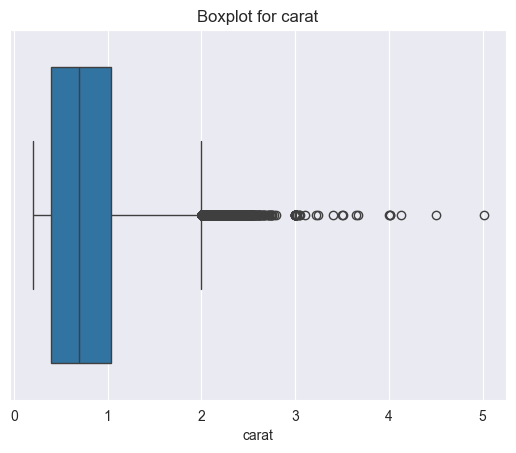

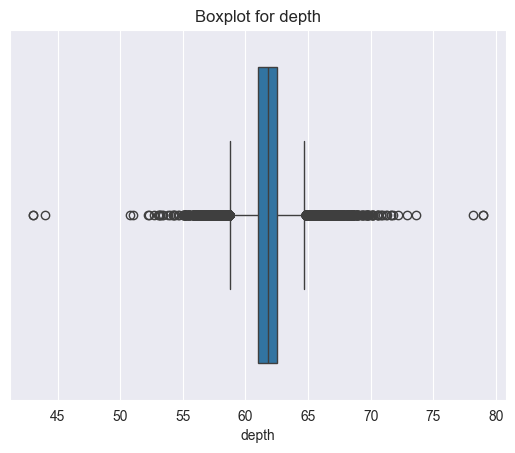

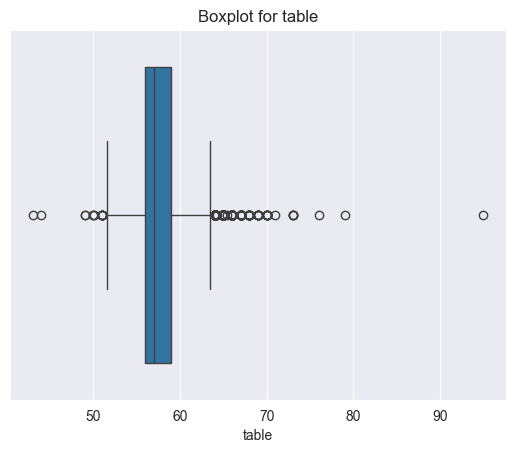

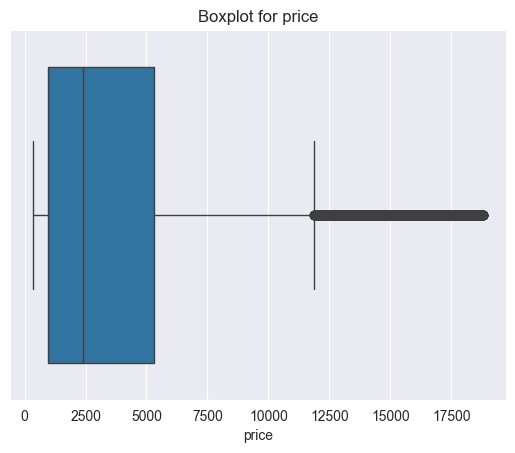

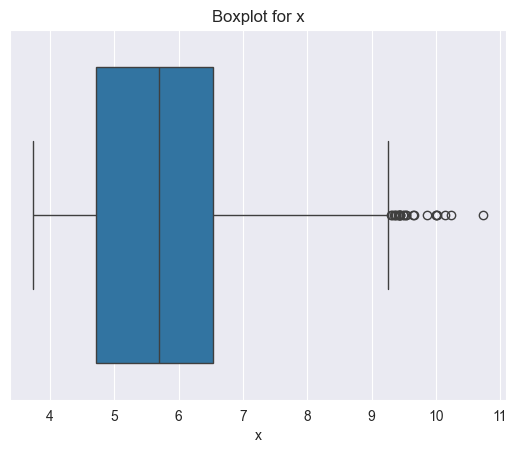

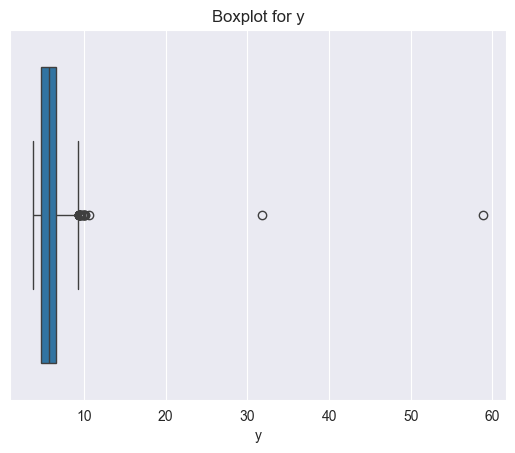

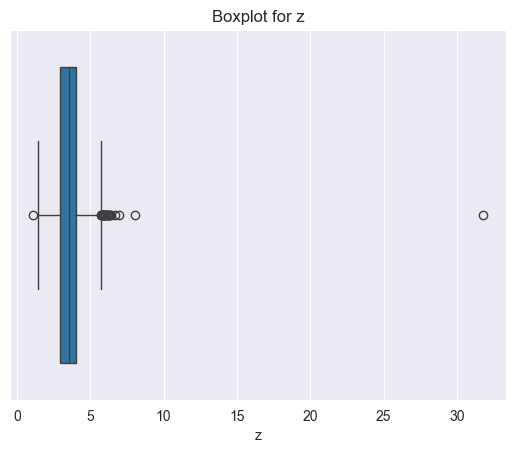

In [56]:
for column in df_numeric.columns:
    sns.boxplot(x=df_numeric[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

After visualizing the data through boxplots and analyzing the impact of outliers on model performance, it was observed that the presence of outliers (even preserving the ones near the whiskers) negatively affected prediction accuracy. So we proceed to remove all the oultiers that are out of the IQR boundaries.

In [57]:
# Initialize a copy of the dataframe
df_cleaned = df_numeric.copy()

# Define  bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove all outliers outside bounds
for col in ['x', 'y', 'z', 'carat', 'depth', 'table', 'price']:
    df_cleaned = df_cleaned[
        (df_cleaned[col] >= lower_bound[col]) & (df_cleaned[col] <= upper_bound[col])
    ]

print(f"Shape of the original dataset: {df_numeric.shape}")
print(f"Shape of the cleaned dataset: {df_cleaned.shape}")

Shape of the original dataset: (53920, 7)
Shape of the cleaned dataset: (47524, 7)


Once we have cleaned our dataset, let's see the variables distribution.

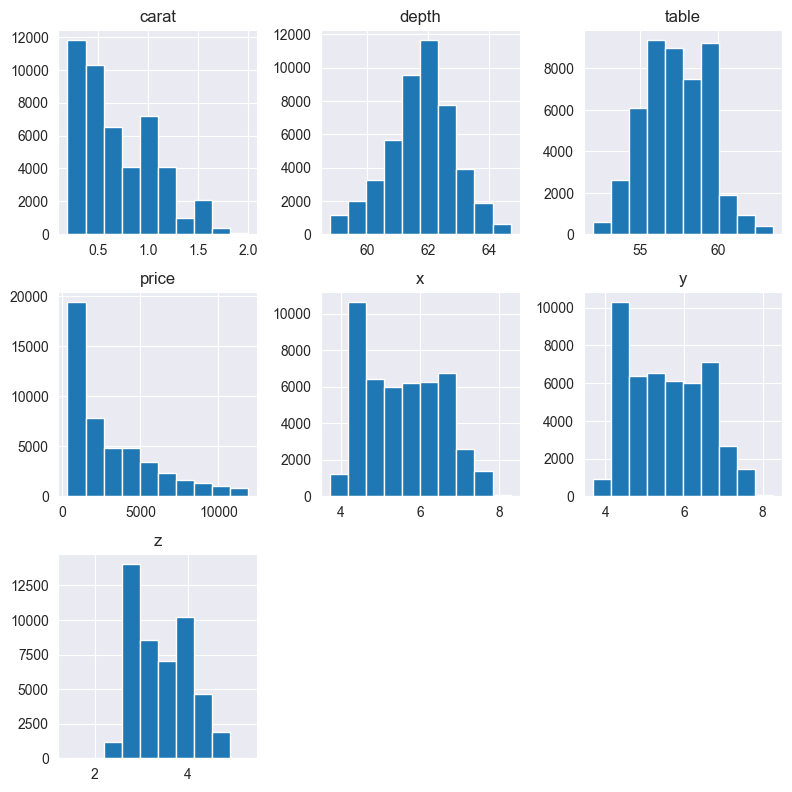

In [58]:
df_cleaned.hist(figsize=(8, 8))
plt.tight_layout(pad=1.0)
plt.show()

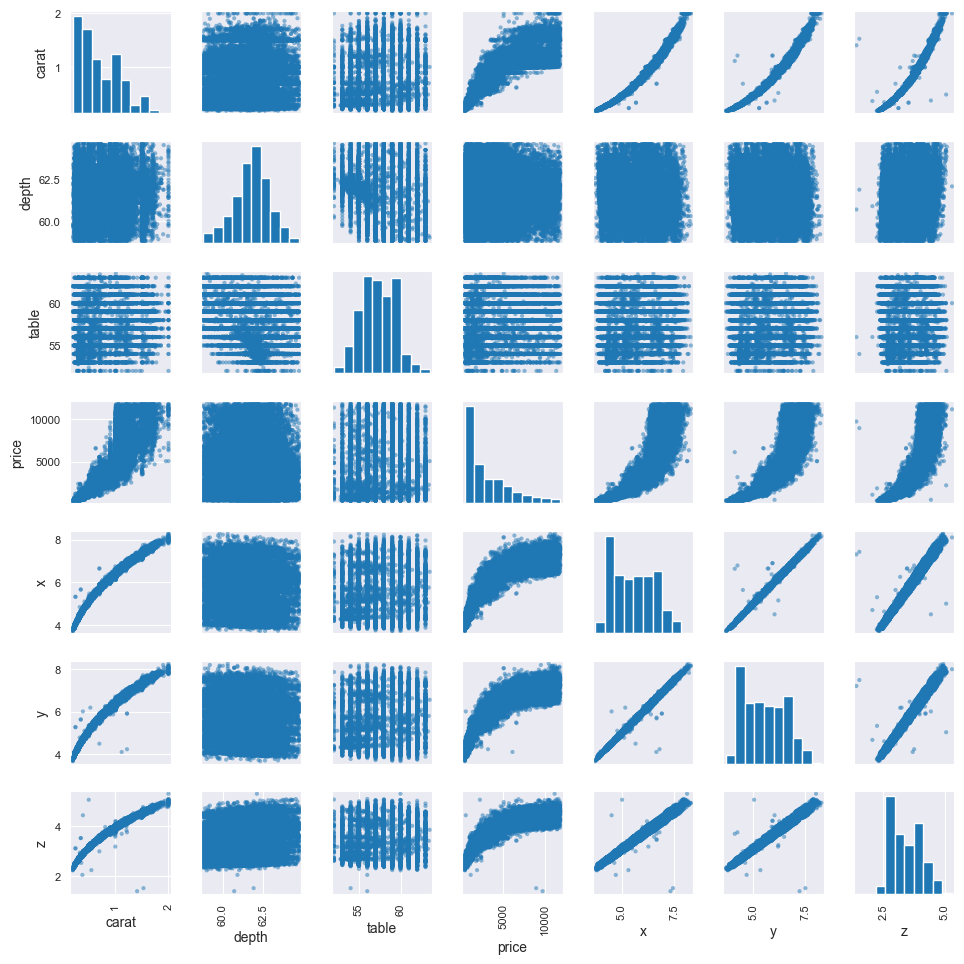

In [59]:
#Print a matrix of scatter plots for all the columns
pd.plotting.scatter_matrix(df_cleaned, figsize=(10, 10))
plt.tight_layout(pad=2.0)   # Add more space between the figures
plt.show()

### Encode categorical features
Ordinal encoding maps each category to a numeric rank based on its order.
* cut: Fair, Good, Very Good, Premium, Ideal
* color: J (worst), I, H, G, F, E, D (best)
* clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

In [60]:
# Retain non-numeric columns separately
non_numeric_columns = ['cut', 'color', 'clarity']
non_numeric_data = df.loc[df_cleaned.index, non_numeric_columns]  # Use the same index as df_cleaned

# Combine cleaned numeric data with the non-numeric data
df_cleaned = pd.concat([df_cleaned, non_numeric_data], axis=1)

cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
df_cleaned['cut'] = df_cleaned['cut'].map(cut_mapping)

color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
df_cleaned['color'] = df_cleaned['color'].map(color_mapping)

clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df_cleaned['clarity'] = df_cleaned['clarity'].map(clarity_mapping)

print(df_cleaned.shape)
df_cleaned.head(5)

(47524, 10)


,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,5,6,2
1,0.21,59.8,61.0,326,3.89,3.84,2.31,4,6,3
3,0.29,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,1,2
5,0.24,62.8,57.0,336,3.94,3.96,2.48,3,1,6


**OBSERVATION**: The number of patterns of the dataset is quite large, which will lead in excessive runtime when running the models. So we will reduce the pattern selection by randomly selecting a subset of the data to work with.

In [64]:
# Reduce dataset size by taking a random sample of rows (e.g., 10,000 patterns)
df_sampled = df_cleaned.sample(n=10000, random_state=42)

# Reset index after sampling
df_sampled.reset_index(drop=True, inplace=True)
df_sampled.describe()

,carat,depth,table,price,x,y,z,cut,color,clarity
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.704432,61.781190,57.264260,3076.323500,5.535665,5.540693,3.421318,4.03250,4.491200,4.122700
std,0.369659,1.096372,2.033586,2734.343905,0.976589,0.970436,0.604217,1.01368,1.676187,1.647457
min,0.200000,58.800000,52.000000,326.000000,3.810000,3.770000,1.530000,1.00000,1.000000,1.000000
25%,0.370000,61.100000,56.000000,886.000000,4.630000,4.630000,2.850000,3.00000,3.000000,3.000000
50%,0.600000,61.900000,57.000000,2042.000000,5.435000,5.450000,3.360000,4.00000,4.000000,4.000000
75%,1.010000,62.500000,59.000000,4545.500000,6.390000,6.390000,3.970000,5.00000,6.000000,5.000000
max,2.000000,64.700000,63.400000,11880.000000,8.160000,8.270000,5.090000,5.00000,7.000000,8.000000


### Normalize/scale numerical features
We will normalize the numerical columns to ensure they are on a similar scale. On the other hand, encoded categorical values (e.g., 1, 2, 3 for ordinal data like 'cut') are already scaled to represent their categories.

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Separate numeric and categorical features
numeric_features = df_sampled[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
categorical_features = df_sampled[['cut', 'color', 'clarity']]

# Normalize numeric features
numeric_features_scaled = pd.DataFrame(
    scaler.fit_transform(numeric_features),
    columns=numeric_features.columns,
    index=numeric_features.index
)

# Combine scaled numeric features with categorical features
df_scaled = pd.concat([numeric_features_scaled, categorical_features], axis=1)
df_scaled.head(5)

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.288889,0.694915,0.526316,0.179159,0.434483,0.440000,0.581461,3,3,4
1,0.727778,0.593220,0.614035,0.970573,0.806897,0.780000,0.848315,4,3,4
2,0.450000,0.457627,0.350877,0.385408,0.613793,0.591111,0.685393,5,3,5
3,0.322222,0.491525,0.526316,0.260343,0.480460,0.480000,0.595506,3,6,4
4,0.288889,0.271186,0.350877,0.231868,0.457471,0.464444,0.558989,5,2,5


In [68]:
df_scaled.describe()

,carat,depth,table,price,x,y,z,cut,color,clarity
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.280240,0.505286,0.461777,0.238041,0.396705,0.393487,0.531269,4.03250,4.491200,4.122700
std,0.205366,0.185826,0.178385,0.236658,0.224503,0.215652,0.169724,1.01368,1.676187,1.647457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000
25%,0.094444,0.389831,0.350877,0.048468,0.188506,0.191111,0.370787,3.00000,3.000000,3.000000
50%,0.222222,0.525424,0.438596,0.148520,0.373563,0.373333,0.514045,4.00000,4.000000,4.000000
75%,0.450000,0.627119,0.614035,0.365198,0.593103,0.582222,0.685393,5.00000,6.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.00000,7.000000,8.000000


After normalization:

- The numeric columns (carat, depth, table, price, x, y, z) have values between 0 and 1.
- The categorical columns (cut, color, clarity) remain unchanged.

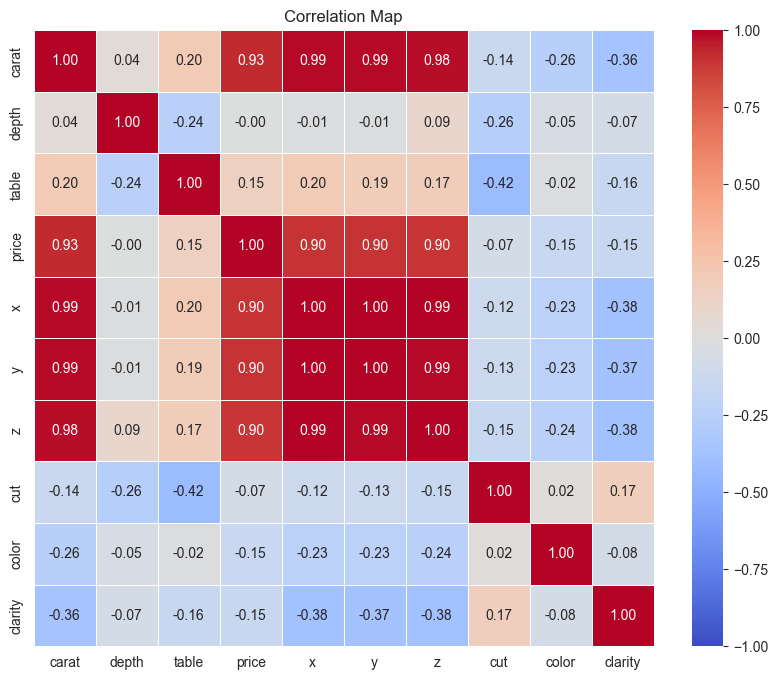

In [69]:
# Compute the correlation matrix
correlation_matrix = df_scaled.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Map")
plt.show()

Once we have our data properly cleaned and scaled, we can extract some observations through the correlation map:

- The most significant predictor of price appears to be carat, as it is strongly correlated with both price and physical dimensions (x, y, z).

- Physical dimensions like x, y, and z also show strong positive correlations with price, meaning that larger diamonds tend to be more expensive.

- Features like cut, color, and clarity do not show strong linear correlations with price (negative correlation)

- The weak correlations of depth and table with most other features suggest that these attributes might not be as critical in predicting price, but they could still contribute marginally.

In [70]:
# Save to csv
df_scaled.to_csv("../data/preprocessed_data.csv", index=False)

### Split data
Split data into 80% for train and 20% for test

In [71]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(['price'], axis=1)  # Features
y = df_scaled['price']                # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (df_scaled.shape)
#print the training and testing sets shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10000, 10)
(8000, 9) (8000,)
(2000, 9) (2000,)


In [72]:
print(X_train.isnull().sum())  # Check for NaN values in features
print(y_train.isnull().sum())  # Check for NaN values in the target

carat      0
depth      0
table      0
x          0
y          0
z          0
cut        0
color      0
clarity    0
dtype: int64
0


### Save dataset
Save the dataset into separate csv files

In [73]:
# Save splits to .csv files
X_train.to_csv("../data/X_train.csv", index=False)
y_train.to_csv("../data/y_train.csv", index=False)
X_test.to_csv("../data/X_test.csv", index=False)
y_test.to_csv("../data/y_test.csv", index=False)